# ADS Homework 4
Wednesday Session, Proffessor Stanislav Sobolevsky

Please submit this assignment to the NYU Classes 'Assignments' section by labeling the assignments with the format **'FULL_NAME - ADS_HW4.ipynb'**. 

This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TAs or Professor Sobolevsky via email or during office hours, in case you have any questions or have some difficulties following the class material.

## Problem 1 - Return on University Education (20 points)

Please read the following article: https://promarket.org/learning-university-pay-off/

Consider Judea Pearl's idea of the ladder of causality that was discussed in class.  Describe whether or not the study described in the article meets the standard of (a) association; (b) intervention; and (c) counterfactual.

**(a)** The study meets the standard of Association as it shows using data that wages of students depend on their education.

**(b)** The study meet the standard of Intervention as by doing an action i.e. reducing the courseload of students and the course lenght it shows a decrease in wages of students. This shows a direct relation between skills gained as a result of college education and the wages while keeping the abilty of students consatnt.

**(c)** The study also shows that in the distribution of employers before and after the reform there is a smaller share of students hired at the highest-paying jobs and that students performed worse in the recruitment process as a result of which wages fell. The study does not attempt to see the effect on wages had there been an action done differently. Thus it does not meet the standard of counterfactual.

In [1]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import datetime as dt
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

## Problem 2 - Markov Processes (40 points)

### Part 1 - Markov Chain Lab (20 points)

* Consider the subway rat problem discussed in class.  
* Add two tracks to the right of Track C, labeling them Track D and Track E.  
* In this situation, treat Track A as an absorbing state.  
* If the rat is on any track other than Tracks A or E, it has probability 0.5 of remaining on that track, probability 0.25 of moving left, and probability 0.25 of moving right.  
* For Track E, assume probability 0.5 of remaining on that track, and probability 0.5 of moving left.  

* Write out the matrix of Markov transition probabilities.  Iterate this matrix forward as many times as is necessary for you to determine empirically its limit.  Based on this limit, what can you say about the evolution of the system if the rat begins on Track C?  How about Track D?  Is there a general conclusion you can draw?

In [6]:
# If on Track A, Pr(stays) = 1/2 and Pr(moves to B) = 1/2
# If on Track B, Pr(stays) = 1/2, Pr(move to A) = 1/4, and Pr(moves to C) = 1/4
# If on Track C, Pr(stays) = 1/2, Pr(move to B) = 1/4, and Pr(moves to D) = 1/4
# If on Track D, Pr(stays) = 1/2, Pr(move to C) = 1/4, and Pr(moves to E) = 1/4
# If on Track E, Pr(stays) = 1/2 and Pr(moves to D) = 1/2 

In [2]:
print("A Rat in a NYC Subway Tunnel")
table = [[" ", "Track A", "Track B", "Track C","Track D", "Track E"],
        ["Track A", "1", "0", "0", "0", "0"],
        ["Track B", "1/4", "1/2", "1/4", "0", "0"],
        ["Track C", "0", "1/4", "1/2"," 1/4", "0"],
        ["Track D","0", "0", "1/4", "1/2", "1/4" ],
        ["Track E", "0", "0", "0", "1/2","1/2"],
        ]
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print()

A Rat in a NYC Subway Tunnel
╒═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│         │ Track A │ Track B │ Track C │ Track D │ Track E │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track A │ 1       │ 0       │ 0       │ 0       │ 0       │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track B │ 1/4     │ 1/2     │ 1/4     │ 0       │ 0       │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track C │ 0       │ 1/4     │ 1/2     │ 1/4     │ 0       │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track D │ 0       │ 0       │ 1/4     │ 1/2     │ 1/4     │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track E │ 0       │ 0       │ 0       │ 1/2     │ 1/2     │
╘═════════╧═════════╧═════════╧═════════╧═════════╧═════════╛



In [3]:
MT = np.matrix('1 0 0 0 0; 0.25 0.5 0.25 0 0; 0 0.25 0.5 0.25 0; 0 0 0.25 0.5 0.25; 0 0 0 0.5 0.5')
print("As an Numpy matrix")
print(MT)

As an Numpy matrix
[[ 1.    0.    0.    0.    0.  ]
 [ 0.25  0.5   0.25  0.    0.  ]
 [ 0.    0.25  0.5   0.25  0.  ]
 [ 0.    0.    0.25  0.5   0.25]
 [ 0.    0.    0.    0.5   0.5 ]]


In [9]:
# The rat begins on Track C
rat = np.matrix('0 0 1 0 0')
print('Probability rat in on Track A, B, C, D or E in the long run')
print(rat * np.linalg.matrix_power(MT, 100))

Probability rat in on Track A, B, C, D or E in the long run
[[ 0.98165359  0.00279307  0.00516093  0.00674308  0.00364933]]


In [10]:
# The rat begins on Track D
rat = np.matrix('0 0 0 1 0')
print('Probability rat in on Track A, B, C, D or E in the long run')
print(rat * np.linalg.matrix_power(MT, 100))

Probability rat in on Track A, B, C, D or E in the long run
[[ 0.97602926  0.00364933  0.00674308  0.00881026  0.00476808]]


From observing the results it can be seen that as the number of iterations increase the probablity of ending up on Track A (the absorbing state ) increases regardless of the fact that the rat starts on which track. 

### Part 2 - Real-world example (20 points)

Similar to the example of a rat moving between subway tracks, let's dig into an example of people moving throughout a subset of 5 Brooklyn Neighborhoods to understand Markov Processes. 
<br><br>
Assumptions made here are that total population is static (i.e. no new entrants or people moving outside of this subset of neighborhoods), and that there's a 40% chance that people stay in their current neighborhood (which can be interpreted as either not moving or moving very close by) and a known probability of moving from one neighborhood to another (these are defined in the code below), with preference shown for bordering neighborhoods. 
<br><br>
We will load geo-data and filter to the specified Brooklyn neighborhoods. We will then examine movement between neighborhoods as a Markov Process, iterating until an equilibrium becomes apparent (hint: you should not see any absorbing states in this example), then visualize and interpret the results.

**a)**: Go through the below example, completing the code where marked. In the end, your dataframe should look similar to the output. (15 points)

In [10]:
import imageio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import time
from IPython.display import HTML

sns.set_style('white')
# filters to apply to the data
county = 'Kings'
hoods  = ['Downtown', 'DUMBO', 'Fort Greene', 'Boerum Hill', 'Clinton Hill']

def get_neighborhoods(file, county=county, neighborhoods=hoods):
    '''
    reads in geopandas file from Zillow, returns geodataframe with specified neighborhoods
    '''
    # read in the geodata file ('file') and consolidate to the 5 selected neighborhoods (listed above)
    #####your code here#####
    ny_gdf=gpd.GeoDataFrame.from_file(file)
    ny_gdf.head()
    find=(ny_gdf['County'] ==county)
    ny_gdf=ny_gdf.loc[find]
    find=ny_gdf['Name'].isin(neighborhoods)
    ny_gdf=ny_gdf.loc[find]
    ny_gdf
    
    # locate coordinate points to plot neighborhood names
    ny_gdf['coords'] = ny_gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    ny_gdf['coords'] = [coords[0] for coords in ny_gdf['coords']]
    return ny_gdf

bk_neighborhoods = get_neighborhoods('ZillowNeighborhoodsNY.shp')
bk_neighborhoods = bk_neighborhoods.sort_values('Name').reset_index(drop=True)
bk_neighborhoods

,State,County,City,Name,RegionID,geometry,coords
0,NY,Kings,New York,Boerum Hill,272994,POLYGON ((-73.98682489707035 40.68846655576456...,"(-73.9864896425407, 40.68600290969882)"
1,NY,Kings,New York,Clinton Hill,270815,"POLYGON ((-73.9619257224787 40.69778778197278,...","(-73.96455445229091, 40.689058350724)"
2,NY,Kings,New York,DUMBO,270841,POLYGON ((-73.98446723099994 40.70646091900005...,"(-73.99003960915954, 40.703545669500045)"
3,NY,Kings,New York,Downtown,270825,POLYGON ((-73.98697203810939 40.70105040762233...,"(-73.98678098579373, 40.693458468711725)"
4,NY,Kings,New York,Fort Greene,273766,POLYGON ((-73.98230754099966 40.70227250100029...,"(-73.97573066517539, 40.69136863239475)"


Above we can see the geodataframe. Now let's plot it: 

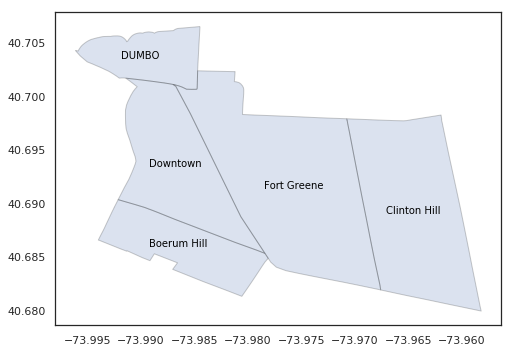

In [11]:
bk_neighborhoods.plot(figsize=(8, 6), edgecolor='black', alpha=0.2)

for idx, row in bk_neighborhoods.iterrows():
    plt.annotate(s=row['Name'], xy=row['coords'], color='Black', horizontalalignment='center', size=10)

Here, we define the likelihoods of moving from one neighborhood to another.
Use a Dirichlet Distrobution (convenient for generating samples that sum to 1.0) to obtain an initial starting population for the neighborhoods https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.dirichlet.html

In [12]:
np.random.seed(42)
data =np.random.dirichlet(np.ones(5),size=1)
#####your code here##### # use a dirichlet distribution to create a 1-by-5 matrix of values that sum to 1.0 
initial_vals = zip(list(bk_neighborhoods.Name), np.array(data)[0])

print('Initial allocations:')
print('--------------------')
for i, j in initial_vals:
    print('{:<13s} {:>5.2f}%'.format(i, round(j, 4)*100))
print('--------------------')
print()

move_likelihoods = np.matrix('0.4 0.1 0.1 0.2 0.2; 0.1 0.4 0.1 0.15 0.25; 0.1 0.1 0.4 0.2 0.2;' 
                             + '0.2 0.05 0.15 0.4 0.2; 0.15 0.2 0.05 0.2 0.4')
pd.DataFrame(data=move_likelihoods, index=bk_neighborhoods.Name, columns=bk_neighborhoods.Name) 
# we could use 'tabulate' here, as this is for visualization purposes, but a pd dataframe is 
# often just as clear and has more compatability with python environments

Initial allocations:
--------------------
Boerum Hill    7.98%
Clinton Hill  51.20%
DUMBO         22.40%
Downtown      15.53%
Fort Greene    2.89%
--------------------



Name,Boerum Hill,Clinton Hill,DUMBO,Downtown,Fort Greene
Name,,,,,
Boerum Hill,0.40,0.10,0.10,0.20,0.20
Clinton Hill,0.10,0.40,0.10,0.15,0.25
DUMBO,0.10,0.10,0.40,0.20,0.20
Downtown,0.20,0.05,0.15,0.40,0.20
Fort Greene,0.15,0.20,0.05,0.20,0.40


Here we will build a Markov process and visualize it in a GIF; this is useful for seeing equilibrium state reached over time. We will then look at the numbers to confirm what the plot is showing us. 

In [13]:
years =7
pct_by_year = []

def plot_neighborhood_movement(years):

    pct_in_hood =data* np.linalg.matrix_power(move_likelihoods,years)#####your code here##### # use the matrix_power function to run a step in the markov process
    bk_neighborhoods['pct_in_hood'] = np.array(pct_in_hood)[0]
    pct_by_year.append(np.array(pct_in_hood)[0])
    vmin, vmax = bk_neighborhoods['pct_in_hood'].min(), bk_neighborhoods['pct_in_hood'].max()

    fig, ax = plt.subplots(figsize=(8,6))
    base = bk_neighborhoods.plot(ax=ax, column='pct_in_hood', edgecolor='grey', 
                                cmap='Blues', vmin=vmin, vmax=vmax, legend=False)

    plt.title('Year:{}'.format(years), size=16)
    
    for idx, row in bk_neighborhoods.iterrows():
        #####your code here##### # put neighborhood names on the plot in red font
        plt.annotate(s=row['Name'], xy=row['coords'], color='Red', horizontalalignment='center', size=10)

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('County.gif', [plot_neighborhood_movement(year) for year in range(years)], fps=1)

HTML('<img src="County.gif">')

**b)**: Interpret the results - what trends do we notice towards the end of the GIF? Why might this be? What would we expect if we ran this over 100 iterations (feel free to try this)? (5 points)


(your answer here) Over the years you see that the people move from Clinton Hill and Dumbo moves towards Fort Greene Downtown and Boerum Hill. This is because the move likelihood from Fort Greene, Downtown and Boerum Hill to Clinton Hill and Dumbo is the least in most cases. Towards the end of the GIF the neighbourhood movement stabilizes.

This is some pretty cool stuff! If you had enough data, you could theoretically do this for all of NYC (you'd additionally have to factor in people moving into and out of the city, but that's not too hard). Further, you might change the percentages over time (e.g. when the L-train shuts down, you may want to lower the % of people moving to Williamsburg in your model). 

## Problem 3 - Time Series (40 points)

This dataset looks at measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years; the data is initially messy, and will take a lot of cleaning. You will find that there is some correlation between the data (i.e. what we know about the current state can tell us something about the future state), and you will then construct an Autoregressive Model to predict future values.

Source: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

Variable Descriptions:
1. date: Date in format dd/mm/yyyy <br> 
2. time: time in format hh:mm:ss <br>
3. global_active_power: household global minute-averaged active power (in kilowatt) <br>
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt) <br>

In [2]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR

sns.set_style('darkgrid')
%matplotlib inline

### Part 1: Reading Data (15 points)
Read in the data. It is in a .txt file, but you can read it in with 'pd.read_csv()' - you may want to consider the  'sep', 'parse_dates', 'usecols', 'infer_datetime_format', 'keep_default_na', 'skip_blank_lines', 'skiprows', and 'dtype' arguements in the function call. 
<br><br>
You also may want to use the 'nrows' arguement or use a limited version of the dataset as you adjust these, as it is a large one. 
<br><br>
Use the column names = ['Date', 'Global_active_power', 'Global_reactive_power']
(15 points)

In [3]:
pwr_consumption = pd.read_csv('household_power_consumption.txt', sep=";",usecols=['Date','Time','Global_active_power', 'Global_reactive_power'], keep_default_na=False, skip_blank_lines=True)#####your code here#####
pwr_consumption.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power
0,16/12/2006,17:24:00,4.216,0.418
1,16/12/2006,17:25:00,5.360,0.436
2,16/12/2006,17:26:00,5.374,0.498
3,16/12/2006,17:27:00,5.388,0.502
4,16/12/2006,17:28:00,3.666,0.528


In [4]:
pwr_consumption['Global_active_power']=pd.to_numeric(pwr_consumption['Global_active_power'], errors='coerce')
pwr_consumption['Global_reactive_power']=pd.to_numeric(pwr_consumption['Global_reactive_power'], errors='coerce')

In [5]:
pwr_consumption.dropna(inplace=True)

In [6]:
#####your code here##### # group the newly-cleaned data by date, using the .sum() function to aggregate
pwr=pwr_consumption.groupby('Date')[['Global_active_power','Global_reactive_power']].sum()
pwr.reset_index(inplace=True)
pwr.head()

,Date,Global_active_power,Global_reactive_power
0,1/1/2007,2749.004,148.166
1,1/1/2008,2759.738,142.508
2,1/1/2009,1406.692,112.668
3,1/1/2010,1224.252,165.336
4,1/10/2007,1720.922,146.734


In [7]:
pwr['Date']=pd.to_datetime(pwr["Date"])
pwr.sort_values('Date',inplace=True)
pwr.head()

,Date,Global_active_power,Global_reactive_power
339,2006-12-16,1209.176,34.922
387,2006-12-17,3390.460,226.006
435,2006-12-18,2203.826,161.792
482,2006-12-19,1666.194,150.942
576,2006-12-20,2225.748,160.998


In [8]:
pwr.index=range(len(pwr))
pwr.head()

,Date,Global_active_power,Global_reactive_power
0,2006-12-16,1209.176,34.922
1,2006-12-17,3390.460,226.006
2,2006-12-18,2203.826,161.792
3,2006-12-19,1666.194,150.942
4,2006-12-20,2225.748,160.998


### Part 2: Visualizing Time-Series (10 points)
Plot data for 'global_active_pwr' and 'global_reactive_pwr' on a time-series. In addition to a standard line plot, also generate a plot using lag_plot() function to examine the correlation. So, your output should have 4 plots. Describe your findings.
<br><br>
Make a function that takes 2 arguments (you may use additional) - a plotting function & data containing the 2 required columns (global_active_pwr, global_reactive_pwr) and then generates the plot specified.
<br><br>
Make sure the plots have a title and the axes are labelled. (10 points)

In [12]:
from pandas.plotting import lag_plot

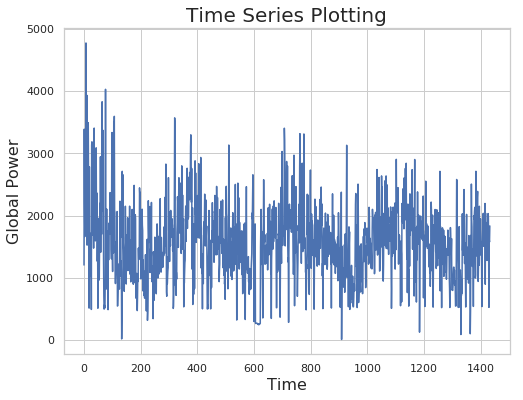

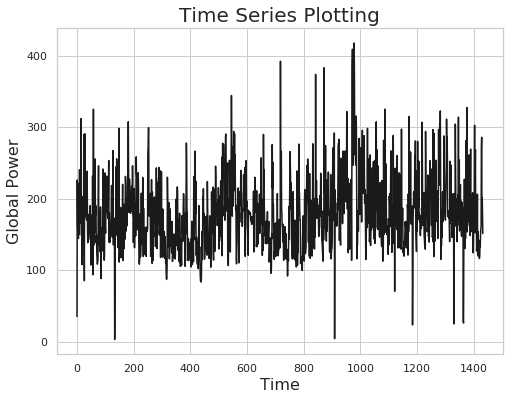

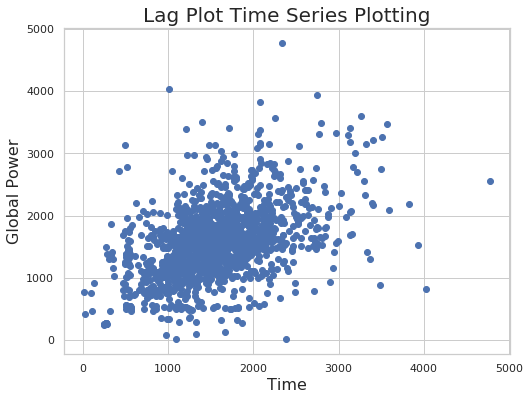

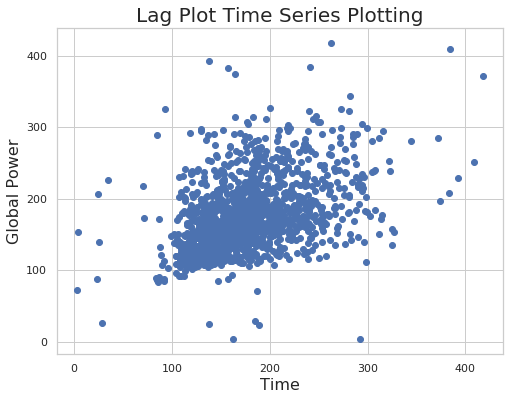

In [13]:
glb_active_pwr   = pwr['Global_active_power']#####your code here#####
glb_reactive_pwr = pwr['Global_reactive_power']#####your code here#####

def func1(series1,series2):
    plt.figure(figsize = (8, 6))
    plt.plot(series1, 'b')
    plt.title('Time Series Plotting', fontsize=20)
    plt.ylabel('Global Power', fontsize=16)
    plt.xlabel('Time', fontsize=16)
    plt.figure(figsize = (8, 6))
    plt.plot(series2, 'k')
    plt.title('Time Series Plotting', fontsize=20)
    plt.ylabel('Global Power', fontsize=16)
    plt.xlabel('Time', fontsize=16)
def func2(series1,series2):
    plt.figure(figsize = (8, 6))
    lag_plot(series1)
    plt.title('Lag Plot Time Series Plotting', fontsize=20)
    plt.ylabel('Global Power', fontsize=16)
    plt.xlabel('Time', fontsize=16)
    plt.figure(figsize = (8, 6))
    lag_plot(series2)
    plt.title('Lag Plot Time Series Plotting', fontsize=20)
    plt.ylabel('Global Power', fontsize=16)
    plt.xlabel('Time', fontsize=16)
    
def time_series_plotting(func, series1, series2, *args):
    """
    takes plotting function, 2 time-series and additional arguments (if required)
    """
    
    #####your code here#####
    func(series1,series2)
    
    plt.show()

time_series_plotting(func1, glb_active_pwr, glb_reactive_pwr)
time_series_plotting(func2, glb_active_pwr, glb_reactive_pwr)

(Describe your findings here) From the plots it can be seen that there are no trends and no stationarity.

### Part 3: Time-Series Forecasting using AR(1) (15 points)
Fit an autoregressive model to the data, and use it to make predictions over the next 30 days of useage (defined by creating a test set from the last 30 days of available data). 
1. Perform a train-test split on time-series data. Explain why random sampling isn't the best option for time-series. 
2. Fit AR(1) model
3. Predict on test set
4. Calculate Root-Mean Squared Error (RMSE) 
$$ RMSE = \frac{1}{N} \sum_{i=0}^N \sqrt{ (\hat{y}_i - y_i)^2 } $$

In [9]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [10]:
len(pwr)

1433

RMSE 505
RMSE 49


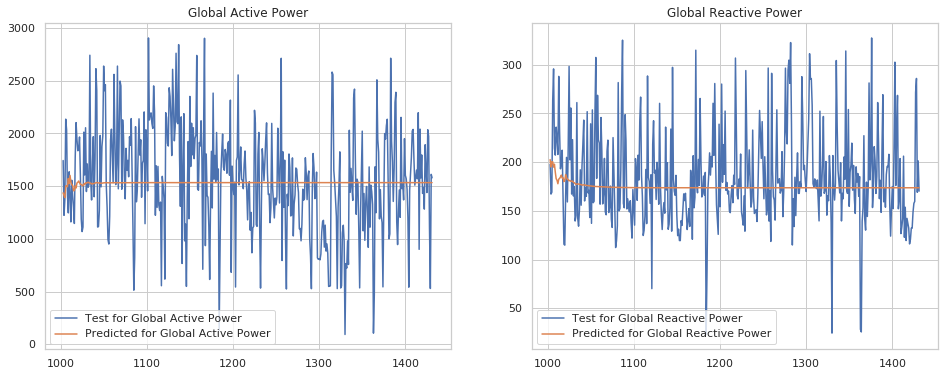

In [19]:
def fit_AR1(series):
    """
    Takes in a Time-series, splits into train and test, fits AR(1) model, predicts on the test set, calculates error
    and return the predictions and the test set for visualization
    """
    # Perform a train-test split on the dataset keeping ~70% for the training set
    train=series[0:int(len(series)*0.7)]#####your code here#####
    test=series[int(len(series)*0.7):-1]
    # Fit AR(1) model
    #####your code here#####
    model = AR(train)
    model_fit = model.fit()
    
    # Get the predictions in an array
    #predictions = #####your code here#####
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    # Obtain and print Root-Mean Squared Error (RMSE)
    #####your code here#####
    error = math.sqrt(mean_squared_error(test, predictions))
    print("RMSE %d"%error)

    return test, predictions

t1, p1 = fit_AR1(glb_active_pwr)
t2, p2 = fit_AR1(glb_reactive_pwr)

fig, ax = plt.subplots(2, figsize=(16,6))

plt.subplot(121)
# Visualize actual values vs predicted values for 'Global Active Power'
#####your code here#####
plt.plot(t1,label="Test for Global Active Power")
plt.plot(p1, label="Predicted for Global Active Power")
plt.title('Global Active Power')
plt.legend()

plt.subplot(122)
# Visualize actual values vs predicted values for 'Global Reactive Power'
#####your code here#####
plt.plot(t2,label="Test for Global Reactive Power")
plt.plot(p2, label="Predicted for Global Reactive Power")
plt.title('Global Reactive Power')
plt.legend()

plt.show()

(Reasoning for train-test split here)The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset in order to test our model’s prediction on this set.

(Describe your findings here) The AR(1) model is unable to predict the values of the time series. Thus a value from a time series is regressed on the previous value from that same time series is not sufficient to predict the values.